In [83]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(0, "..")
sys.path.insert(0, "../src")

from graph_generation import generate_random_graph, load_cracow_city_graph
from common.show_graph import show_graph
from initial_population import create_initial_population

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
# G, best_paths = generate_random_graph(20)
G, best_paths = load_cracow_city_graph()

/home/norbert/.local/lib/python3.11/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [123]:
population = create_initial_population(G, best_paths)

In [124]:
# show_graph(G, population[0], show=True)

In [125]:
from fitness import fitness

fitness(population[0], G)

219974984.21022183

In [143]:
edge_colors = {}

for line in population[0].lines:
    for v, u in line.edges:
        #         u, v = line.stops[i], line.stops[i+1]
        #         print(edge_colors.index())
        #         print(u, v, 0)
        #         print(v, u, 0)
        #         print((u, v, 0) in G.edges)
        edge = (v, u, 0)
        edge_colors[edge] = line.edge_color

#         break
#     break
#     print(line.stops, line.edge_color)

C = []
for edge in G.edges:
    if edge in edge_colors:
        C.append(edge_colors[edge])
    else:
        C.append("#333")

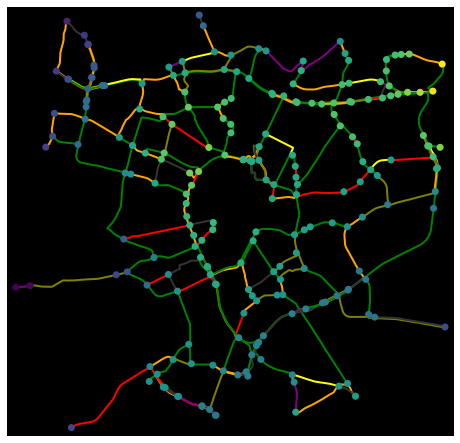

In [144]:
import osmnx as ox

fig, ax = ox.plot_graph(
    G,
    bgcolor="k",
    node_color=G.graph["points"],
    node_size=50,
    edge_linewidth=2,
    edge_color=C,
)

Population     0, best fitness function:     235681344.094407, best lines stops count: Counter({48: 1, 84: 1, 115: 1, 33: 1, 118: 1, 93: 1, 58: 1, 131: 1, 19: 1, 129: 1})no of lines: 10


KeyboardInterrupt: 

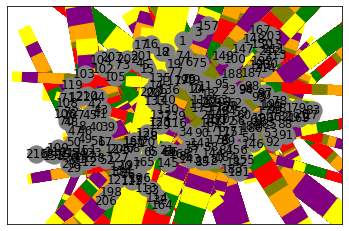

In [155]:
from new_generation.Mutators import LineMutator, GenotypeMutator
from new_generation.SpecimenCrossers import GenotypeCrosser
from new_generation.Sanitizers import BasicSanitizer
from new_generation.new_generation_function import NewGenerationRandomParams
from SimultionEngine import SimulationEngine

line_mutator = LineMutator(G, list(range(len(G))), best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(G, best_paths)
sanitizer = BasicSanitizer(best_paths)

new_generation_params = NewGenerationRandomParams(
    chance_create_line=[0.1],
    chance_cycle=[0.1],
    chance_erase_line=[0.1],
    chance_invert=[0.5],
    chance_merge=[0.25],
    chance_merge_specimen=[0.5],
    chance_rot_cycle=[0.5],
    chance_rot_right=[0.5],
    chance_split=[0.75],
    chance_erase_stop=[0.1],
    chance_add_stop=[0.3],
    chance_add_stop_mix=[0.1],
    chance_replace_stops=[0.1],
    chance_replace_stops_proximity=[0.1],
    chance_merge_mix=[0.5],  # brak wplywu
    cycle_stops_shift=[0.5],  # brak wplywu
    chance_cycle_stops_shift=[0.1],
    chance_line_based_merge=[0.1],
)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 8
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
        sanitizer,
        new_generation_params,
    ),
    population_sanitizer=sanitizer,
)

sim_engine.run(100, 20, report_show=True)